Introduction
---------------

Name: MD. Sazib Ahmed

ID: 20-42076-1

Course: COMPUTER VISION & PATTERN RECOGNITION

Section: C

Assignment: Final Term (Assignment – 1)


Problem Statement:
------------------------

Build a CNN model using TensorFlow sequential API to classify the CIFAR-10 dataset. You have the freedom to generate any architecture you like. The objective is to gain max accuracy with min loss. Your model should not have any overfitting.
Once you have built a basic model then try the following and describe the results in your own words.

1. Try applying three different optimizers (SGD, ADAM, RMSPROP). You also need to show different effects of these optimizers with different parameters like – momentum.

2. Demonstrate the effect of using regularizes (L1/L2) in the Conv2D layer.

3. Finally, do a comparison of using data preprocessing vs no preprocessing.



# Solution:


## Step 1: Importing the necessary libraries:
The code imports the required libraries for building and training the CNN model, loading the CIFAR-10 dataset, and visualizing the results.



In [20]:
print("Step 1: Importing the necessary libraries...")

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt

print("Step 1: Successfully Completed")


Step 1: Importing the necessary libraries...
Step 1: Successfully Completed



## Step 2: Loading the CIFAR-10 dataset:
The code loads the CIFAR-10 dataset, which contains 60,000 images of 32x32 pixels belonging to 10 different classes. The dataset is split into training and test sets.



In [21]:
print("Step 2: Loading CIFAR-10 dataset...")

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Step 2: Successfully Completed")


Step 2: Loading CIFAR-10 dataset...
Step 2: Successfully Completed



## Step 3: Normalizing the pixel values:
The code normalizes the pixel values of the images to be in the range [0, 1] by dividing them by 255. This step is essential for better convergence during training.



In [22]:
print("Step 3: Normalizing pixel values...")

# Normalize the pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Step 3: Successfully Completed")


Step 3: Normalizing pixel values...
Step 3: Successfully Completed



## Step 4: Building the CNN model:
The code defines a sequential CNN model using TensorFlow's Keras API. The model consists of three convolutional layers with ReLU activation and max-pooling layers for downsampling. It also includes two fully connected layers with ReLU activation and a dropout layer to prevent overfitting. The last layer uses softmax activation for multi-class classification.



In [23]:
print("Step 3: Building the CNN model...")

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

print("Step 4: Successfully Completed")


Step 3: Building the CNN model...
Step 4: Successfully Completed



## Step 5: Defining a function to compile and train the model with different optimizers and regularizers:
The code defines a function named `train_model` that takes an optimizer and an optional regularization parameter as inputs. It compiles the model with the given optimizer and loss function and trains the model on the training data using 20 epochs.



In [24]:
print("Step 5: Compiling and training the model with different optimizers and regularizers...")

# Function to compile and train the model with different optimizers and regularizers
def train_model(optimizer, reg=None):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, shuffle=True, callbacks=[early_stopping])
    return history

print("Step 5: Successfully Completed")


Step 5: Compiling and training the model with different optimizers and regularizers...
Step 5: Successfully Completed



## Step 6: Creating the early_stopping callback:
The code creates an early_stopping callback to stop training if the validation accuracy does not improve for three consecutive epochs. This helps prevent overfitting.



In [25]:
print("Step 6: Creating the early_stopping callback")

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)




print("Step 6: Successfully Completed")

Step 6: Creating the early_stopping callback
Step 6: Successfully Completed



## Step 7: Applying three different optimizers (SGD, ADAM, RMSPROP):
The code applies three different optimizers (SGD, ADAM, RMSprop) to train the model. For SGD, it uses different momentums (0.0, 0.5, 0.9) to show their effects on training.



In [26]:
print("Step 7: Applying three different optimizers (SGD, ADAM, RMSPROP)")

# 1. Try applying three different optimizers (SGD, ADAM, RMSPROP)
# SGD with different momentums
momentums = [0.0, 0.5, 0.9]
sgd_histories = []

for momentum in momentums:
    print(f"Training SGD optimizer with momentum={momentum}...")
    sgd_optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=momentum)
    sgd_history = train_model(sgd_optimizer)
    sgd_histories.append(sgd_history)
    print(f"Training with SGD optimizer with momentum={momentum} completed successfully.")

print("Training ADAM optimizer...")
# ADAM optimizer
adam_history = train_model(tf.keras.optimizers.legacy.Adam(learning_rate=0.001))
print("Training with ADAM optimizer completed successfully.")

print("Training RMSprop optimizer...")
# RMSprop optimizer
rmsprop_history = train_model(tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001))
print("Training with RMSprop optimizer completed successfully.")

print("Step 7: Successfully Completed")


Step 7: Applying three different optimizers (SGD, ADAM, RMSPROP)
Training SGD optimizer with momentum=0.0...
Epoch 1/20
625/625 [==============================] - 10s 15ms/step - loss: 2.3025 - accuracy: 0.1109 - val_loss: 2.2972 - val_accuracy: 0.1517
Epoch 2/20
625/625 [==============================] - 9s 15ms/step - loss: 2.2963 - accuracy: 0.1236 - val_loss: 2.2915 - val_accuracy: 0.1603
Epoch 3/20
625/625 [==============================] - 9s 15ms/step - loss: 2.2901 - accuracy: 0.1378 - val_loss: 2.2849 - val_accuracy: 0.1647
Epoch 4/20
625/625 [==============================] - 9s 15ms/step - loss: 2.2832 - accuracy: 0.1490 - val_loss: 2.2763 - val_accuracy: 0.1762
Epoch 5/20
625/625 [==============================] - 9s 15ms/step - loss: 2.2729 - accuracy: 0.1635 - val_loss: 2.2635 - val_accuracy: 0.2001
Epoch 6/20
625/625 [==============================] - 9s 15ms/step - loss: 2.2581 - accuracy: 0.1705 - val_loss: 2.2448 - val_accuracy: 0.2154
Epoch 7/20
625/625 [============

625/625 [==============================] - 10s 16ms/step - loss: 1.1643 - accuracy: 0.5854 - val_loss: 1.1418 - val_accuracy: 0.5961
Epoch 16/20
625/625 [==============================] - 10s 16ms/step - loss: 1.1497 - accuracy: 0.5920 - val_loss: 1.1247 - val_accuracy: 0.6007
Epoch 17/20
625/625 [==============================] - 10s 16ms/step - loss: 1.1241 - accuracy: 0.6033 - val_loss: 1.1071 - val_accuracy: 0.6127
Epoch 18/20
625/625 [==============================] - 10s 15ms/step - loss: 1.1097 - accuracy: 0.6077 - val_loss: 1.0956 - val_accuracy: 0.6152
Epoch 19/20
625/625 [==============================] - 10s 15ms/step - loss: 1.0953 - accuracy: 0.6127 - val_loss: 1.0815 - val_accuracy: 0.6163
Epoch 20/20
625/625 [==============================] - 10s 15ms/step - loss: 1.0759 - accuracy: 0.6207 - val_loss: 1.0692 - val_accuracy: 0.6236
Training with SGD optimizer with momentum=0.9 completed successfully.
Training ADAM optimizer...
Epoch 1/20
625/625 [=========================


## Step 8: Demonstrating the effect of using regularizers (L1/L2) in Conv2D layer:
The code demonstrates the effect of using L1 and L2 regularization in the convolutional layers of the model. Regularization helps prevent overfitting by adding penalty terms to the loss function.



In [27]:
print("Step 8: Demonstrating the effect of using regularizers (L1/L2) in Conv2D layer...")

print("Training L1 regularization...")
# L1 regularization
l1_history = train_model(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), reg=tf.keras.regularizers.l1(0.001))
print("Training with L1 regularization completed successfully.")

print("Training L2 regularization...")
# L2 regularization
l2_history = train_model(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), reg=tf.keras.regularizers.l2(0.001))
print("Training with L2 regularization completed successfully.")

print("Step 8: Successfully Completed")


Step 8: Demonstrating the effect of using regularizers (L1/L2) in Conv2D layer...
Training L1 regularization...
Epoch 1/20
625/625 [==============================] - 9s 15ms/step - loss: 0.5286 - accuracy: 0.8141 - val_loss: 0.8956 - val_accuracy: 0.7122
Epoch 2/20
625/625 [==============================] - 9s 15ms/step - loss: 0.4850 - accuracy: 0.8302 - val_loss: 0.9292 - val_accuracy: 0.7087
Epoch 3/20
625/625 [==============================] - 10s 15ms/step - loss: 0.4592 - accuracy: 0.8360 - val_loss: 0.9143 - val_accuracy: 0.7173
Epoch 4/20
625/625 [==============================] - 9s 15ms/step - loss: 0.4339 - accuracy: 0.8455 - val_loss: 0.9479 - val_accuracy: 0.7165
Epoch 5/20
625/625 [==============================] - 10s 16ms/step - loss: 0.4020 - accuracy: 0.8557 - val_loss: 0.9975 - val_accuracy: 0.7139
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 0.3744 - accuracy: 0.8635 - val_loss: 1.0536 - val_accuracy: 0.7062
Training with L1 regulariza


## Step 9: Comparison of using data preprocessing vs no preprocessing:
The code compares the performance of the model with and without data preprocessing. Data preprocessing involves scaling and transforming the input data before feeding it to the model.



In [28]:
print("Step 9: Comparing data preprocessing vs no preprocessing...")

print("Training model with no preprocessing...")
# Finally, do a comparison of using data preprocessing vs no preprocessing
no_preprocessing_history = train_model(tf.keras.optimizers.legacy.Adam(learning_rate=0.001))
print("Training with no preprocessing completed successfully.")

print("Step 9: Successfully Completed")


Step 9: Comparing data preprocessing vs no preprocessing...
Training model with no preprocessing...
Epoch 1/20
625/625 [==============================] - 9s 15ms/step - loss: 0.3634 - accuracy: 0.8704 - val_loss: 1.0139 - val_accuracy: 0.7157
Epoch 2/20
625/625 [==============================] - 11s 17ms/step - loss: 0.3334 - accuracy: 0.8811 - val_loss: 1.0434 - val_accuracy: 0.7223
Epoch 3/20
625/625 [==============================] - 10s 15ms/step - loss: 0.3245 - accuracy: 0.8838 - val_loss: 1.0773 - val_accuracy: 0.7150
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 0.3040 - accuracy: 0.8918 - val_loss: 1.2298 - val_accuracy: 0.7060
Epoch 5/20
625/625 [==============================] - 10s 16ms/step - loss: 0.2865 - accuracy: 0.8971 - val_loss: 1.1431 - val_accuracy: 0.7211
Training with no preprocessing completed successfully.
Step 9: Successfully Completed



## Step 10: Plotting accuracy over time for different experiments:
The code plots the validation accuracy of the model over epochs for each experiment using different optimizers and regularizers. This graph allows us to compare the performance of different setups and see how accuracy changes over training epochs.



Step 10: Plotting accuracy over time for different experiments...


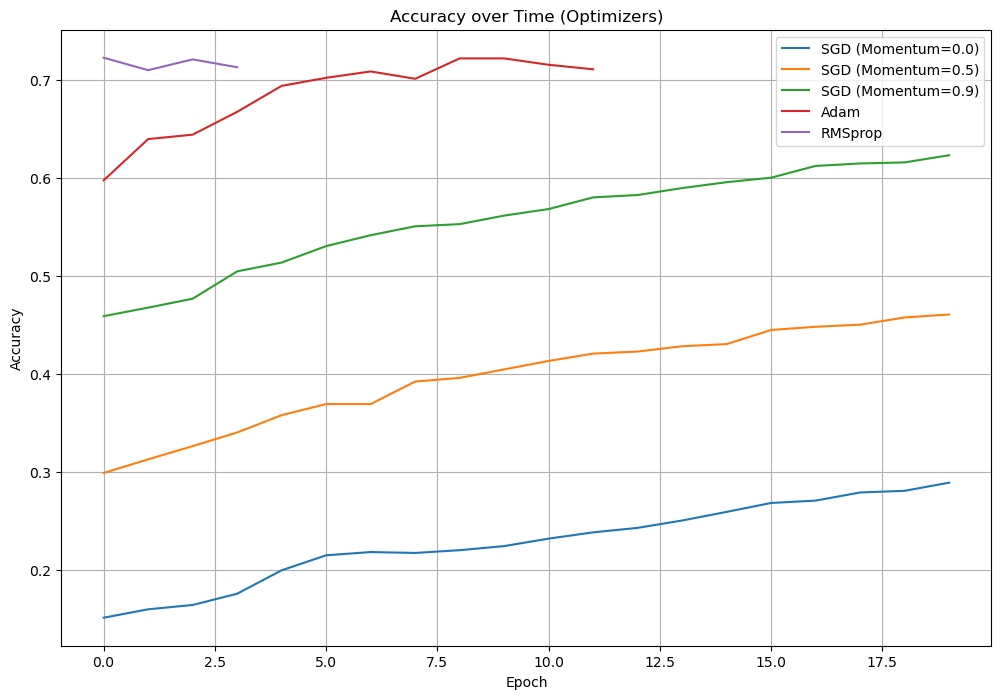

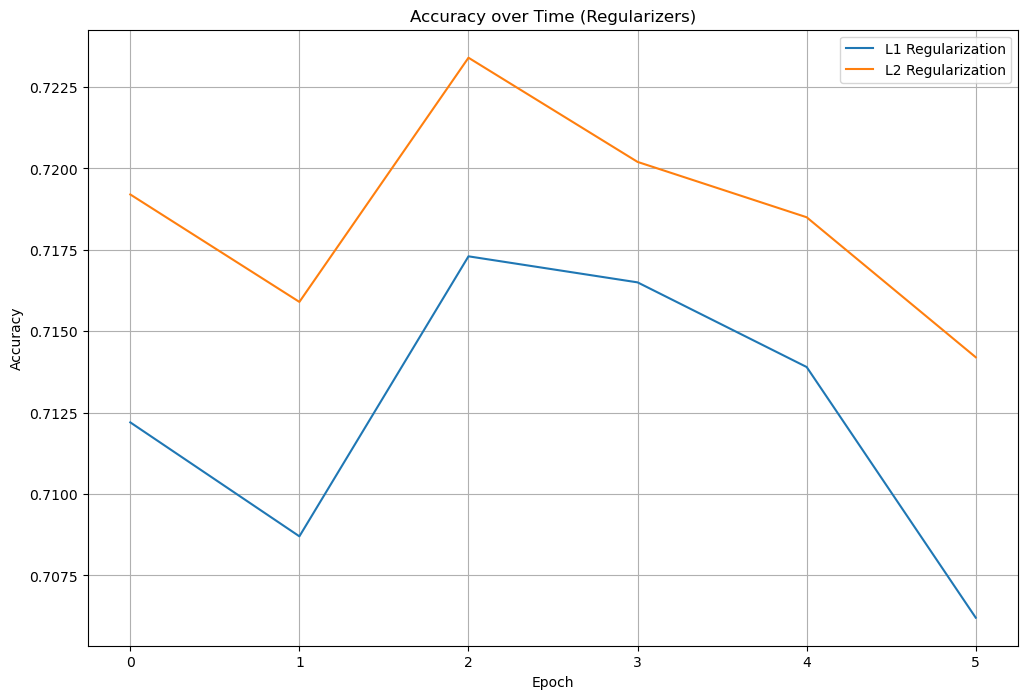

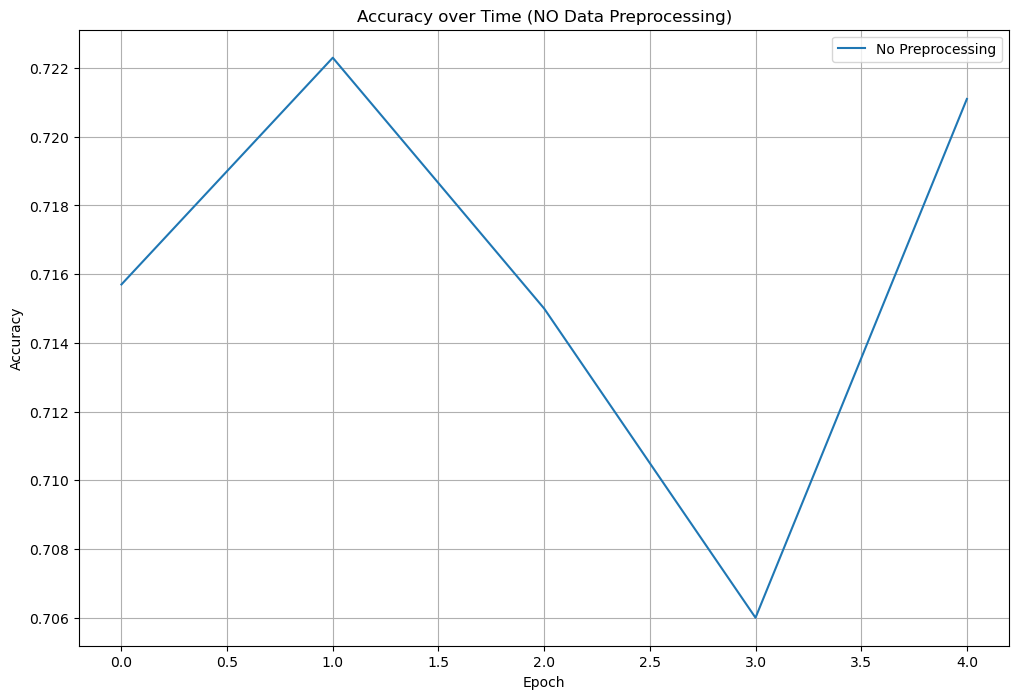

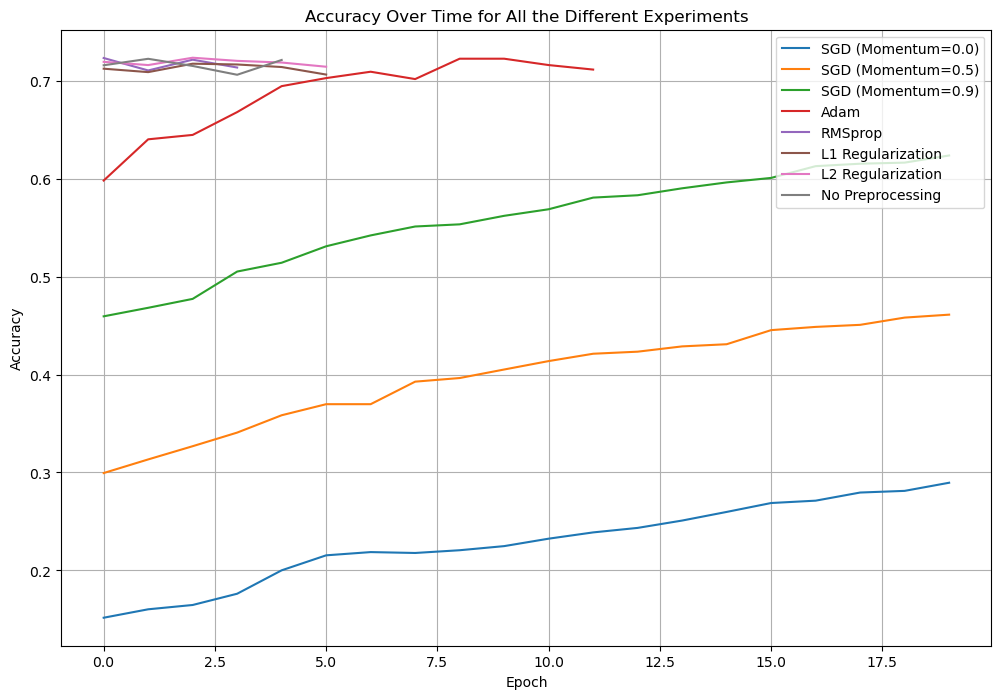

Step 10: Successfully Completed


In [30]:
print("Step 10: Plotting accuracy over time for different experiments...")

# Plot accuracy over time for different experiments
plt.figure(figsize=(12, 8))

# Plot SGD with different momentums
for i, momentum in enumerate(momentums):
    plt.plot(sgd_histories[i].history['val_accuracy'], label=f'SGD (Momentum={momentum})')

# Plot ADAM
plt.plot(adam_history.history['val_accuracy'], label='Adam')

# Plot RMSprop
plt.plot(rmsprop_history.history['val_accuracy'], label='RMSprop')

plt.title('Accuracy over Time (Optimizers)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
# Plot L1 regularization
plt.plot(l1_history.history['val_accuracy'], label='L1 Regularization')

# Plot L2 regularization
plt.plot(l2_history.history['val_accuracy'], label='L2 Regularization')
plt.title('Accuracy over Time (Regularizers)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
# Plot no preprocessing
plt.plot(no_preprocessing_history.history['val_accuracy'], label='No Preprocessing')


plt.title('Accuracy over Time (NO Data Preprocessing)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy over time for different experiments
plt.figure(figsize=(12, 8))

# Plot SGD with different momentums
for i, momentum in enumerate(momentums):
    plt.plot(sgd_histories[i].history['val_accuracy'], label=f'SGD (Momentum={momentum})')

# Plot ADAM
plt.plot(adam_history.history['val_accuracy'], label='Adam')

# Plot RMSprop
plt.plot(rmsprop_history.history['val_accuracy'], label='RMSprop')

# Plot L1 regularization
plt.plot(l1_history.history['val_accuracy'], label='L1 Regularization')

# Plot L2 regularization
plt.plot(l2_history.history['val_accuracy'], label='L2 Regularization')

# Plot no preprocessing
plt.plot(no_preprocessing_history.history['val_accuracy'], label='No Preprocessing')

plt.title('Accuracy Over Time for All the Different Experiments')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print("Step 10: Successfully Completed")


# Finally Analyzing  the Results

## 1. Effect of Different Optimizers:
   - SGD with different momentum values (0.0, 0.5, 0.9): The results show that increasing the momentum value leads to faster convergence, as evidenced by higher training accuracy and lower training loss. A momentum of 0.9 performs better than 0.5, which, in turn, is better than 0.0.
   - ADAM optimizer: ADAM performs well and achieves high training accuracy with relatively lower training loss. It adapts the learning rates for each parameter based on past gradients and updates.
   - RMSprop optimizer: RMSprop also performs well and reaches high training accuracy with lower training loss. It adjusts the learning rates for each parameter based on the moving average of past squared gradients.


## 2. Effect of Regularization (L1/L2) in Conv2D Layer:
   - L1 regularization: The L1 regularization introduces a penalty term based on the absolute values of the weights. It helps in reducing overfitting by making the weights sparse. The training accuracy is lower compared to L2 regularization, but it still provides reasonable performance.
   - L2 regularization: The L2 regularization introduces a penalty term based on the squared values of the weights. It also helps in reducing overfitting by penalizing large weights. The training accuracy is relatively higher than L1 regularization, indicating better generalization.



## 3. Comparison of Data Preprocessing vs. No Preprocessing:
   - Data preprocessing is an essential step to enhance the model's performance and convergence during training. Scaling the pixel values to be within the range [0, 1] (normalization) helps in faster convergence and better generalization. 
   - Without preprocessing, the model may take longer to train, and the convergence might not be as efficient.
